# Penetration Depth Distribution

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from inverse_modelling_tfo.tools.name_decoder import decode_extended_filename
from ipywidgets import interact
import ipywidgets as widgets
from tfo_sensitivity.data import load_raw
from inverse_modelling_tfo.tools.s_based_intensity_datagen import MU_MAP_BASE1, MU_MAP_BASE2, get_mu_a
from tfo_sensitivity.calculate_intensity import create_quantized_tof_const_res, generate_intensity_column


plt.rcParams['figure.dpi'] = 150    # Smaller plot
# plt.rcParams['figure.dpi'] = 700    # Paper-ready plots


maternal_wall_thickness, uterus_thickness = 4, 5
raw_sim_data_path_wv1 = load_raw(maternal_wall_thickness, uterus_thickness, 1)
raw_sim_data_path_wv2 = load_raw(maternal_wall_thickness, uterus_thickness, 2)
raw_sim_data_wv1 = pd.read_pickle(raw_sim_data_path_wv1)
raw_sim_data_wv2 = pd.read_pickle(raw_sim_data_path_wv2)

# Create SDD column!
raw_sim_data_wv1['SDD'] = raw_sim_data_wv1['X'] - 100
raw_sim_data_wv2['SDD'] = raw_sim_data_wv2['X'] - 100

In [11]:
# Create Intensity Column
SDD_INDEX = 3

MATERNAL_Hb = 8.
MATERNAL_SAT = 1.0
FETAL_SAT = 0.50
FETAL_Hb = 0.20

modified_mu_map_wv1 = MU_MAP_BASE1.copy()
modified_mu_map_wv1[1] = get_mu_a(MATERNAL_SAT, MATERNAL_Hb, 1)
modified_mu_map_wv1[4] = get_mu_a(FETAL_SAT, FETAL_Hb, 1)

modified_mu_map_wv2 = MU_MAP_BASE2.copy()
modified_mu_map_wv2[1] = get_mu_a(MATERNAL_SAT, MATERNAL_Hb, 2)
modified_mu_map_wv2[4] = get_mu_a(FETAL_SAT, FETAL_Hb, 2)


raw_sim_data_wv1["Intensity"] = generate_intensity_column(raw_sim_data_wv1, modified_mu_map_wv1)
raw_sim_data_wv2["Intensity"] = generate_intensity_column(raw_sim_data_wv2, modified_mu_map_wv2)

In [12]:
all_sdd = raw_sim_data_wv1['SDD'].unique()

In [13]:
# Finding Penetratioon Depth
filtered_data = raw_sim_data_wv1[raw_sim_data_wv1['SDD'] == all_sdd[1]].copy()
filtered_data["Layers Traversed"] = (filtered_data["L1 ppath"] != 0.).astype(int) + (filtered_data["L2 ppath"] != 0.).astype(int) + (filtered_data["L3 ppath"] != 0.).astype(int) + (filtered_data["L4 ppath"] != 0.).astype(int)
a = filtered_data.groupby('Layers Traversed')["Intensity"].sum()

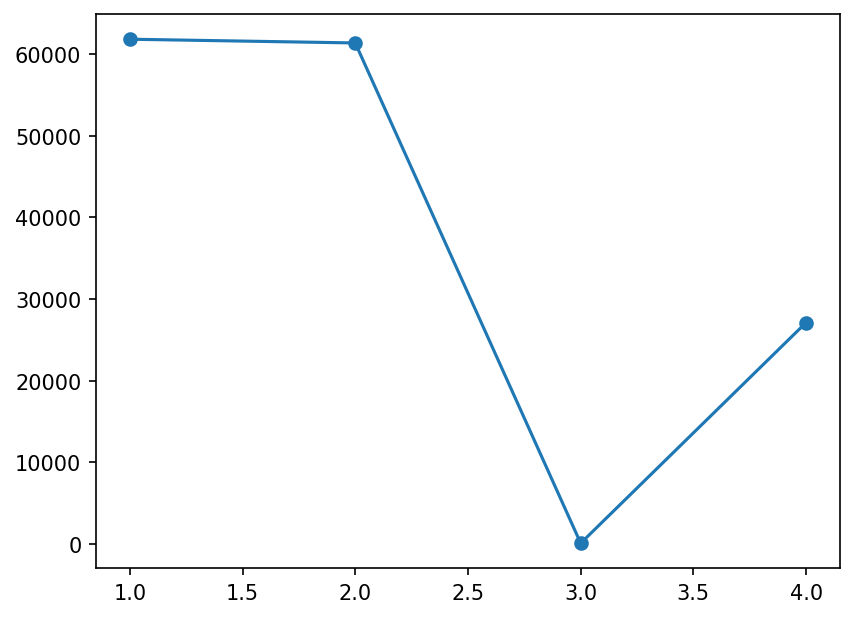

In [14]:
plt.plot(a, 'o-')

In [15]:
a

Layers Traversed
1    61829.329673
2    61371.844929
3       87.808219
4    27124.111491
Name: Intensity, dtype: float64